In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [2]:
myticker ='TOFB'
df = web.DataReader([myticker], 'yahoo', start='2016-1-1')['Close']
df.columns = {'Close Price'}
df.head(10)

,Close Price
Date,
2016-01-04,4.17
2016-01-05,4.01
2016-01-06,4.01
2016-01-07,3.98
2016-01-08,4.04
2016-01-11,4.04
2016-01-12,3.55
2016-01-13,3.60
2016-01-14,3.75


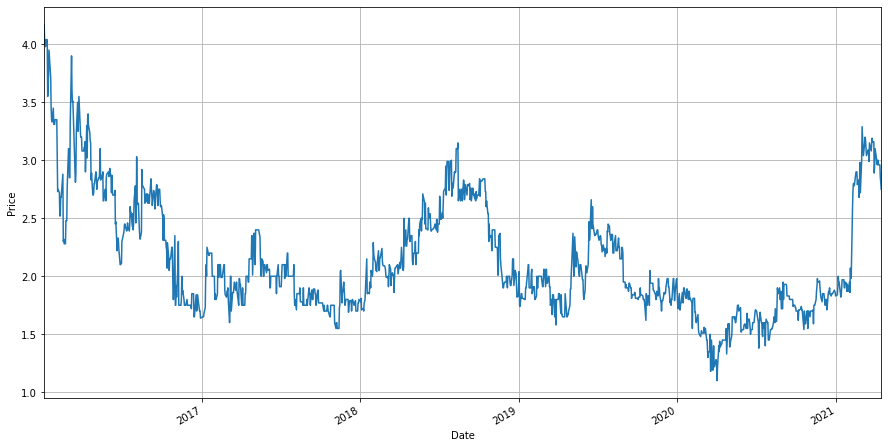

In [3]:
df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

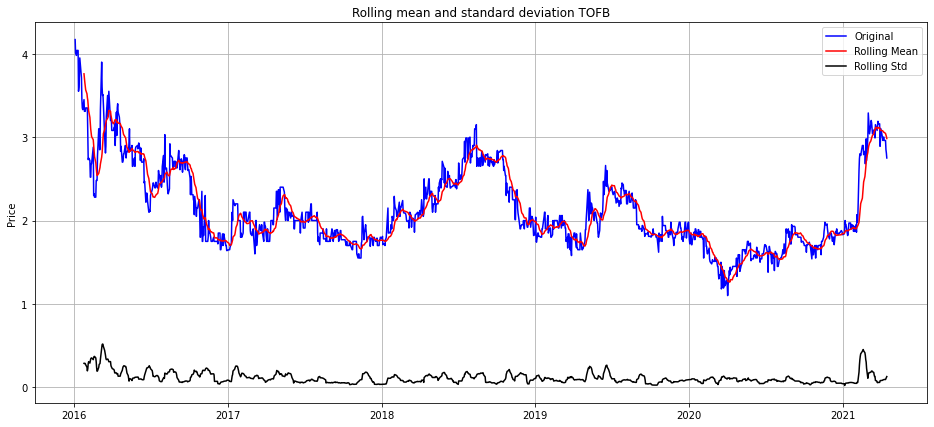

In [4]:
rolling_mean = df['Close Price'].rolling(15).mean()
rolling_std = df['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [5]:
# create 20 days simple moving average column
df['SMA20'] = df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

,Close Price,SMA20,SMA50
Date,,,
2016-01-04,4.17,4.170000,4.170000
2016-01-05,4.01,4.090000,4.090000
2016-01-06,4.01,4.063334,4.063334
2016-01-07,3.98,4.042500,4.042500
2016-01-08,4.04,4.042000,4.042000


### Trade signals 

###### When the short term moving average crosses above the long term moving average, this indicates a buy signal.
###### Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [6]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [7]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Close Price,SMA20,SMA50,Signal,Position
Date,,,,,
2016-01-04,4.17,4.170000,4.170000,0.0,NaN
2016-01-05,4.01,4.090000,4.090000,0.0,0.0
2016-01-06,4.01,4.063334,4.063334,0.0,0.0
2016-01-07,3.98,4.042500,4.042500,0.0,0.0
2016-01-08,4.04,4.042000,4.042000,0.0,0.0


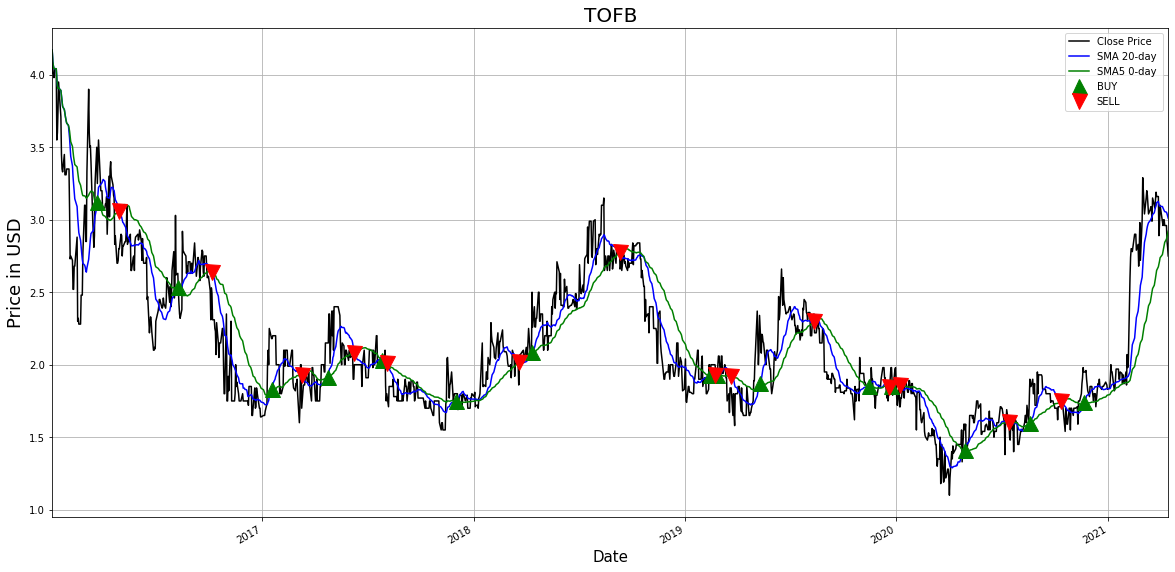

In [8]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close Price'].plot(color = 'k', label= 'Close Price') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [9]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2016-03-22 00:00:00 |          3.25 |  3.1235 |  3.0968 |        1 | Buy        |
| 2016-04-29 00:00:00 |          2.8  |  3.0365 |  3.0592 |        0 | Sell       |
| 2016-08-08 00:00:00 |          2.63 |  2.535  |  2.5252 |        1 | Buy        |
| 2016-10-06 00:00:00 |          2.49 |  2.6325 |  2.641  |        0 | Sell       |
| 2017-01-18 00:00:00 |          2.18 |  1.8325 |  1.8154 |        1 | Buy        |
| 2017-03-10 00:00:00 |          1.7  |  1.9175 |  1.9298 |        0 | Sell       |
| 2017-04-24 00:00:00 |          2.15 |  1.9135 |  1.9098 |        1 | Buy        |
| 2017-06-09 00:00:00 |          2    |  2.081  |  2.0816 |        0 | Sell       |
| 2017-07-26 00:00:00 |          2    |  2.0305 |  2.0288 |        1 | Buy  